In [1]:
using Plots, DelimitedFiles, LaTeXStrings, Statistics
gr()

home = "/home/pbarletta/labo/18/lbp/run"
rtdos = "/home/pbarletta/labo/18/lbp/rtdos_log"
pdbs = "/home/pbarletta/labo/18/lbp/top_files/originales_pdbs"

"/home/pbarletta/labo/18/lbp/top_files/originales_pdbs"

In [2]:
function read_rmsf(pdb)
    fname = joinpath(home, pdb, "rmsf", string("rmsf_", pdb))
    rmsf_ = Symbol("rmsf_", pdb)
    ex = :(($rmsf_, header) = readdlm($fname, header = true))
    eval(ex)
end

function get_sse(location, pdb)
    helices = Array{UnitRange{Int64}, 1}()
    sheets = Array{UnitRange{Int64}, 1}()

    open(joinpath(location, string(pdb, ".pdb"))) do f
        while !eof(f)
            ln = readline(f)
            if ln[1:5] == "HELIX"
                found_helix = true
                push!(helices, UnitRange{Int64}(
                        parse(Int64, ln[22:25]), parse(Int64, ln[34:37])) )
            elseif ln[1:5] == "SHEET"
                found_sheet = true
                push!(sheets, UnitRange{Int64}(
                        parse(Int64, ln[23:26]), parse(Int64, ln[34:37])) )
            elseif ln[1:4] == "ATOM"
                break
            end
        end
    end
    
    return helices, sheets
end

function get_sse_wrapper(path, pdb)
    helices_ = Symbol("helices_", pdb)
    sheets_ = Symbol("sheets_", pdb)
    
    ex = :(($helices_, $sheets_) = get_sse($path, $pdb))
    eval(ex)
end

function plot_sse(rango, h, nombre, color)
    sse = collect(rango)
    plot!(sse, fill(h, length(sse)),
        linewidth = 5, label = nombre, linecolor = color, line = :solid)
end

function scatter_sse(rango, h, nombre, color)
    sse = collect(rango)
    scatter!(sse, fill(h, length(sse)),
        markersize = 1, label = nombre, fillcolor = color, line = :solid)
end

scatter_sse (generic function with 1 method)

### get data

In [3]:
read_rmsf("1ifb")
read_rmsf("2ifb")
read_rmsf("4uet")
read_rmsf("4xcp")

read_rmsf("wat1ifb")

get_sse_wrapper(pdbs, "1ifb")
get_sse_wrapper(pdbs, "2ifb")
get_sse_wrapper(pdbs, "4uet")
get_sse_wrapper(pdbs, "4xcp")

rango_ifb = 7:126
rango_4 = 10:144

10:144

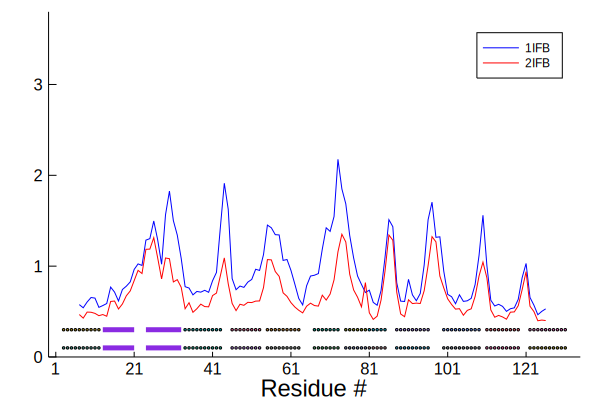

\AA]$: undefined symbol


In [5]:
plt_rmsf_beta = plot(rango_ifb, rmsf_1ifb[:, 2],
    ylims = (0, 3.8), xticks = 1:20:121,
    linecolor = Colors.colorant"#0000FF",
    grid = false, label = "1IFB",
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = L"Fluctuation $[\AA]$", xaxis = "Residue #")

plot!(rango_ifb, rmsf_2ifb[:, 2],
    linecolor = Colors.colorant"#FF0000", label = "2IFB")

for each in helices_1ifb
   plot_sse(each, 0.3, "", Colors.colorant"#8A2BE2")
end

for each in sheets_1ifb
   scatter_sse(each, 0.3, "", Colors.colorant"#A52A2A")
end

for each in helices_2ifb
   plot_sse(each, 0.1, "", Colors.colorant"#8A2BE2")
end

for each in sheets_2ifb
   scatter_sse(each, 0.1, "", Colors.colorant"#A52A2A")
end

plt_rmsf_beta

In [6]:
hcat([ mean(rmsf_1ifb[:, 2]), mean(rmsf_2ifb[:, 2])], [ std(rmsf_1ifb[:, 2]), std(rmsf_2ifb[:, 2]) ])

2×2 Array{Float64,2}:
 0.94475   0.372736
 0.704536  0.24767 

In [162]:
savefig(plt_rmsf_beta, joinpath(rtdos, "papel", "extra", string("rmsf_1ifb_2ifb.svg")))

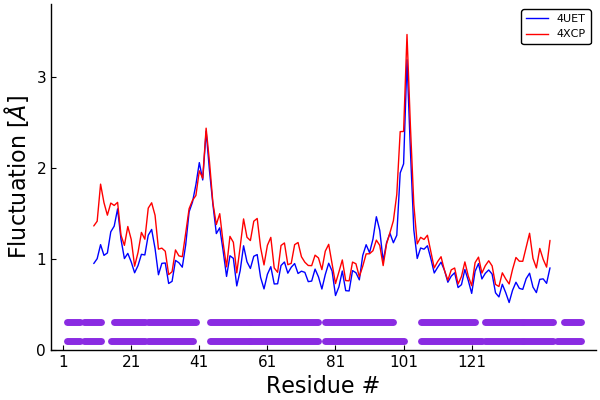

In [160]:
plt_rmsf_alfa = plot(rango_4, rmsf_4uet[:, 2],
    ylims = (0, 3.8), xticks = 1:20:121,
    linecolor = Colors.colorant"#0000FF",
    grid = false, label = "4UET",
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = L"Fluctuation $[\AA]$", xaxis = "Residue #")

plot!(rango_4, rmsf_4xcp[:, 2],
    linecolor = Colors.colorant"#FF0000", label = "4XCP")

for each in helices_4uet
   plot_sse(each, 0.3, "", Colors.colorant"#8A2BE2")
end

for each in sheets_4uet
   scatter_sse(each, 0.3, "", Colors.colorant"#A52A2A")
end

for each in helices_4xcp
   plot_sse(each, 0.1, "", Colors.colorant"#8A2BE2")
end

for each in sheets_4xcp
   scatter_sse(each, 0.1, "", Colors.colorant"#A52A2A")
end

plt_rmsf_alfa

In [69]:
hcat([ mean(rmsf_4uet[:, 2]), mean(rmsf_4xcp[:, 2])], [ std(rmsf_4uet[:, 2]), std(rmsf_4xcp[:, 2]) ])

2×2 Array{Float64,2}:
 1.01782  0.391093
 1.18255  0.408225

In [161]:
savefig(plt_rmsf_alfa, joinpath(rtdos, "papel", "extra", string("rmsf_4uet_4xcp.svg")))

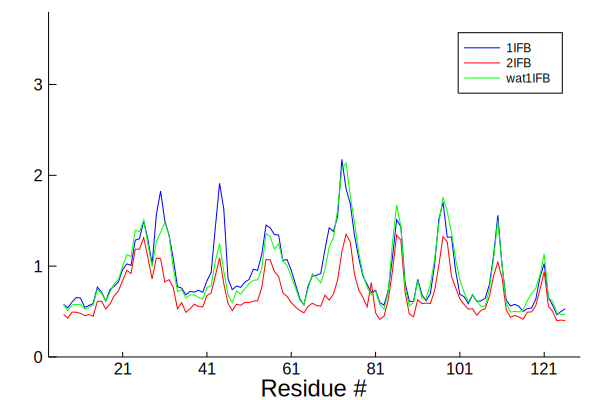

\AA]$: undefined symbol


In [7]:
plt_rmsf_wat1ifb = plot(rango_ifb, rmsf_1ifb[:, 2],
    ylims = (0, 3.8), xticks = 1:20:121,
    linecolor = Colors.colorant"#0000FF",
    grid = false, label = "1IFB",
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = L"Fluctuation $[\AA]$", xaxis = "Residue #")

plot!(rango_ifb, rmsf_2ifb[:, 2],
    linecolor = Colors.colorant"#FF0000", label = "2IFB")

plot!(rango_ifb, rmsf_wat1ifb[:, 2],
    linecolor = Colors.colorant"#00FF00", label = "wat1IFB")

In [8]:
[ mean(rmsf_wat1ifb[:, 2]), std(rmsf_wat1ifb[:, 2]) ]

2-element Array{Float64,1}:
 0.9126933333333335 
 0.36288092260243654

In [146]:
savefig(plt_rmsf_alfa, joinpath(rtdos, "papel", "extra", string("rmsf_wat1ifb.svg")))

## RMSD

In [9]:
using Chemfiles, LinearAlgebra, CSV, DataFrames
rmsd_path = "/home/pbarletta/labo/18/lbp/rmsd"

function gte_ca(frm = Chemfiles::Frame)
    return convert(Array{Int64, 1}, evaluate(Selection("name CA"), frm)) .+ 1
end

ArgumentError: ArgumentError: Package Chemfiles not found in current path:
- Run `import Pkg; Pkg.add("Chemfiles")` to install the Chemfiles package.


In [10]:
# Beta
trj_1ifb = Trajectory(joinpath(rmsd_path, string("avg_", "1ifb", ".pdb")))
frm_1ifb = read(trj_1ifb)
xyz_1ifb = positions(frm_1ifb)

trj_2ifb = Trajectory(joinpath(rmsd_path, string("avg_", "2ifb", ".pdb")))
frm_2ifb = read(trj_2ifb)
xyz_2ifb = positions(frm_2ifb)

# Alfa
trj_4uet = Trajectory(joinpath(rmsd_path, string("avg_", "4uet", ".pdb")))
frm_4uet = read(trj_4uet)
xyz_4uet = positions(frm_4uet)

trj_4xcp = Trajectory(joinpath(rmsd_path, string("avg_", "4xcp", ".pdb")))
frm_4xcp = read(trj_4xcp)
xyz_4xcp = positions(frm_4xcp)

ca_1ifb = gte_ca(frm_1ifb)
ca_2ifb = gte_ca(frm_2ifb)
pop!(ca_2ifb)
ca_4uet = gte_ca(frm_4uet)
ca_4xcp = gte_ca(frm_4xcp)
pop!(ca_4xcp)

d_beta = reshape(mapslices(x -> norm(x), 
            (xyz_2ifb[:, ca_2ifb] .- xyz_1ifb[:, ca_1ifb]), dims = 1), length(ca_1ifb))
d_alfa = reshape(mapslices(x -> norm(x),
            (xyz_4xcp[:, ca_4xcp] .- xyz_4uet[:, ca_4uet]), dims = 1), length(ca_4uet));

UndefVarError: UndefVarError: rmsd_path not defined

In [ ]:
idx_d_beta = sortperm(d_beta, rev = true)
CSV.write(joinpath(rmsd_path, "idx_d_beta.csv"),
    DataFrame(resi = idx_d_beta, Distance = d_beta[idx_d_beta]))

idx_d_alfa = sortperm(d_alfa, rev = true)
CSV.write(joinpath(rmsd_path, "idx_d_alfa.csv"),
    DataFrame(resi = idx_d_alfa, Distance = d_alfa[idx_d_alfa]))

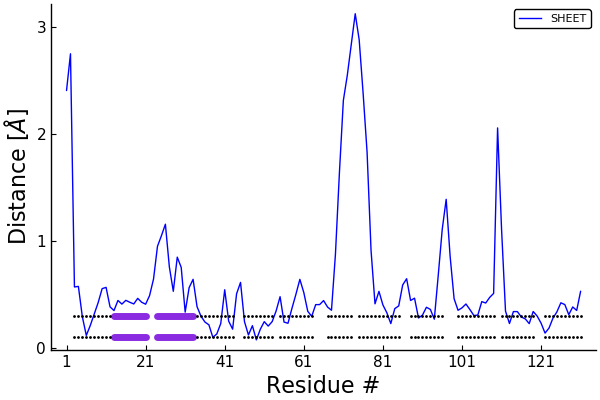

In [50]:
plt_d_beta = plot(d_beta,
#     ylims = (0, 4.5),
    xticks = 1:20:121,
    linecolor = Colors.colorant"#0000FF",
    grid = false, label = "SHEET",
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = L"Distance $[\AA]$", xaxis = "Residue #")

for each in helices_1ifb
   plot_sse(each, .3, "", Colors.colorant"#8A2BE2")
end

for each in sheets_1ifb
   scatter_sse(each, .3, "", Colors.colorant"#A52A2A")
end

for each in helices_2ifb
   plot_sse(each, 0.1, "", Colors.colorant"#8A2BE2")
end

for each in sheets_2ifb
   scatter_sse(each, 0.1, "", Colors.colorant"#A52A2A")
end

plt_d_beta

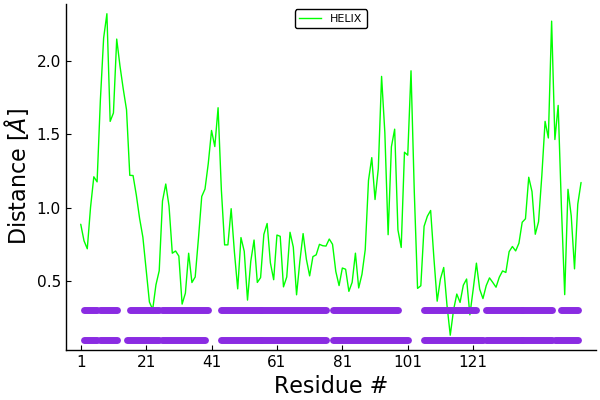

In [49]:
plt_d_beta = plot(d_alfa,
#     ylims = (0, 4.5),
    xticks = 1:20:121,
    linecolor = Colors.colorant"#00FF00",
    grid = false, label = "HELIX",
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = L"Distance $[\AA]$", xaxis = "Residue #")

for each in helices_4uet
   plot_sse(each, .3, "", Colors.colorant"#8A2BE2")
end

for each in sheets_4uet
   scatter_sse(each, .3, "", Colors.colorant"#A52A2A")
end

for each in helices_4xcp
   plot_sse(each, 0.1, "", Colors.colorant"#8A2BE2")
end

for each in sheets_4xcp
   scatter_sse(each, 0.1, "", Colors.colorant"#A52A2A")
end

plt_d_beta

## Obtengo la estructura más parecida al average

img = "/home/pbarletta/labo/18/lbp/rtdos_log/papel/img"

function write_bio_avg(path, pdb)
    rmsd = convert(Array{Float64, 1}, readdlm(joinpath(path, string("rmsd_", pdb)))[2:end, 2]);
    trj_in = Trajectory(joinpath(home, pdb, "data", string("full_fit_", pdb, ".nc")))
    in_top_trj = Trajectory(joinpath(img, string("avg_", pdb, ".pdb")))
    in_top_frm = read(in_top_trj)
    in_top = Topology(in_top_frm)
    in_frm = read_step(trj_in, argmin(rmsd) - 1)
    set_topology!(in_frm, in_top)
    trj_out = Trajectory(joinpath(path, string("top_", pdb, ".pdb")), 'w')
    write(trj_out, in_frm)
    close(trj_out)
    close(trj_in)
end

write_bio_avg(img, "1ifb")
write_bio_avg(img, "2ifb")
write_bio_avg(img, "4uet")
write_bio_avg(img, "4xcp")